<table align="center" style="width: 100%; text-align: center; line-height: 1.8; font-size: 18px; font-family: Arial, sans-serif;">
  <tr>
    <td>
      <h2>Actividad 4 - Práctica, visualización y Python</h2>
      <br><br>
      <strong>Darwin Rosero Díaz - @dantedrd</strong><br>
      <strong>Marilin Alejandra Ávila González</strong><br>
      <strong>Pablo González Sierra</strong>
      <br><br><br>
      <strong>Corporación Universitaria Iberoamericana</strong><br>
      <strong>Facultad de Ingeniería</strong><br>
      <strong>Ingeniería en Ciencia de Datos - Virtual</strong><br>
      <strong>Analítica de Datos</strong><br>
      <strong>JULIAN LOPEZ</strong>
      <br><br><br>
      <strong>Bogotá D.C</strong><br>
      <strong>Marzo 2025</strong>
    </td>
  </tr>
</table>

todos los ejercicios realizados se hicieron a parte del dataset de [dataset_chinook](./Chinook_MySql.sql)

# **Primero importamos las librerias necesarias**  

In [4]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* **Ahoro vamos a realizar la conexion con la base de datos**

In [5]:
usuario = 'root'
contraseña = ''
host = 'localhost'
puerto = 3306
base_de_datos = 'Chinook'

conexion = create_engine(f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{base_de_datos}")

# **1. Traigamos el top de artistas con mas canciones en el genero de rock**   

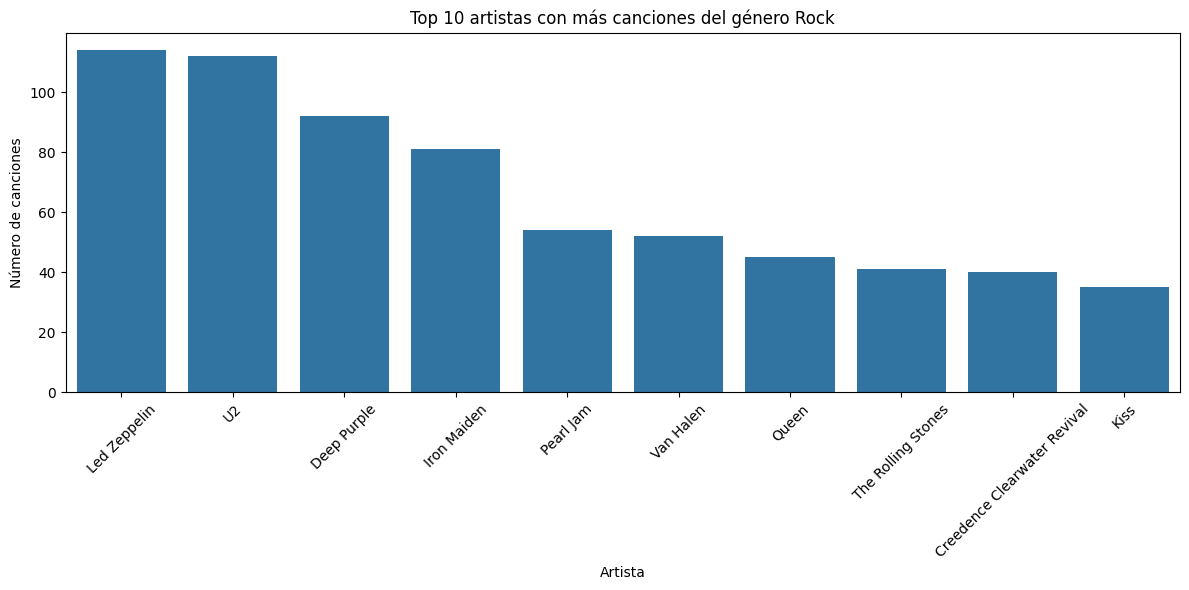

In [6]:
query = """
SELECT 
    album.Title AS album,
    track.Name AS track,
    artist.Name AS artist,
    Genre.Name AS genre
FROM track
INNER JOIN album ON track.AlbumId = album.AlbumId
INNER JOIN artist ON album.ArtistId = artist.ArtistId
INNER JOIN Genre ON track.GenreId = Genre.GenreId
WHERE Genre.Name = 'Rock';
"""

# 1.  Leer en un DataFrame
df = pd.read_sql(query, conexion)

# Agrupar por artista y contar cuántas canciones tiene cada uno
conteo_artistas = df.groupby("artist").count()["track"].reset_index()
conteo_artistas = conteo_artistas.sort_values(by="track", ascending=False).head(10)  # Top 10 artistas

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=conteo_artistas, x="artist", y="track")
plt.title("Top 10 artistas con más canciones del género Rock")
plt.xlabel("Artista")
plt.ylabel("Número de canciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**como podemos observar entre los grupos de led zeppeling  y  U2 podemos encontrar los grupos que mas canciones de rock tienen dentro de este dataset**

# **2. top 10 generos con mas caciones**

* **Primero preparamos el query** 

In [7]:
query = """
SELECT Genre.Name AS genre, COUNT(*) AS num_tracks
FROM track
JOIN genre ON track.GenreId = genre.GenreId
GROUP BY Genre.Name
ORDER BY num_tracks DESC
LIMIT 10;
"""

* **ahora ejecutamos el query y ordanamos por numero de canciones** 

In [9]:
df = pd.read_sql(query, conexion)

df = df.sort_values(by="num_tracks", ascending=False)

* **ahora creamos el grafico**  

C:\Users\DARWIN\AppData\Local\Temp\ipykernel_25256\1066209673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="num_tracks", y="genre", palette="viridis")


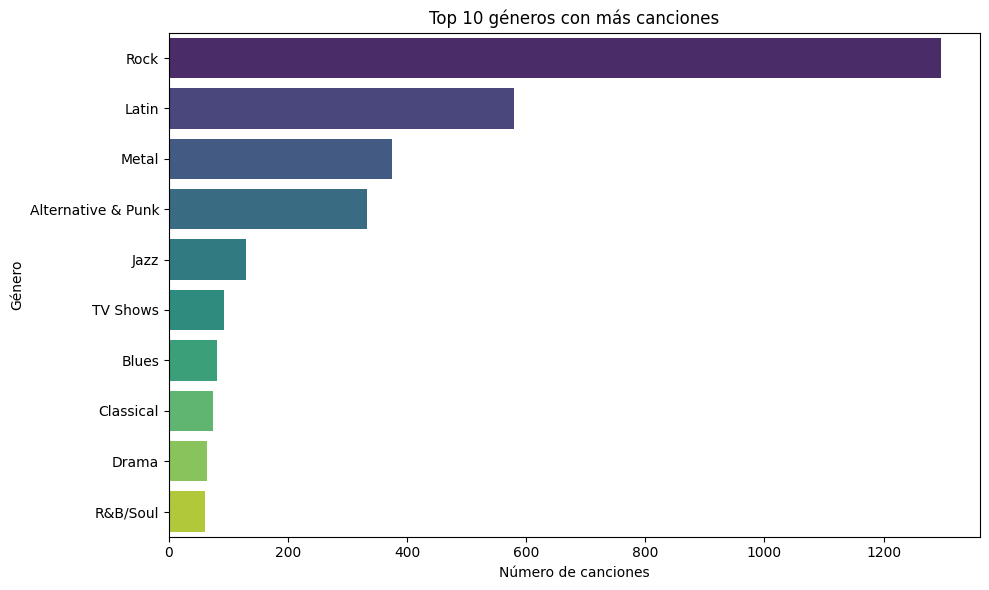

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="num_tracks", y="genre", palette="viridis")
plt.title("Top 10 géneros con más canciones")
plt.xlabel("Número de canciones")
plt.ylabel("Género")
plt.tight_layout()
plt.show()

# **3. sacamos el top 10 de canciones con artistas mas compradas**  

In [ ]:
#primero definimos el query
query = """
SELECT CONCAT(a.Name, ' - ', t.Name) AS cancion_artista, SUM(il.Quantity) AS total_comprada
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist a ON al.ArtistId = a.ArtistId
GROUP BY cancion_artista
ORDER BY total_comprada DESC
LIMIT 10;
"""

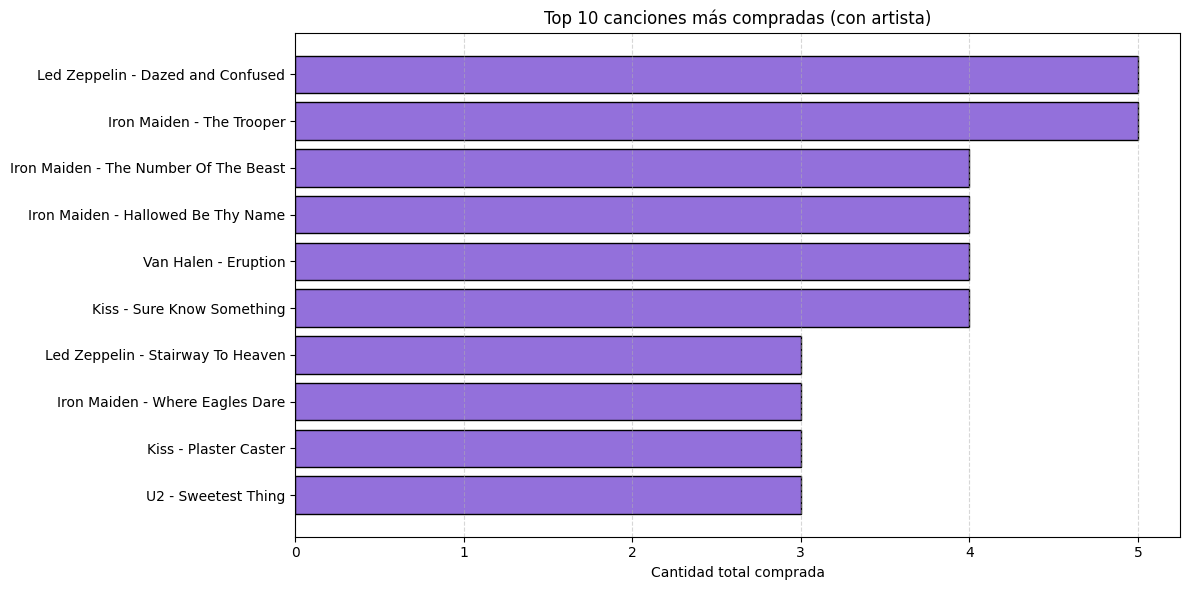

In [ ]:

df = pd.read_sql(query, conexion)

# Ordenar el grafico de forma horizontal para una visual mas clara
df = df.sort_values(by="total_comprada", ascending=True)


etiquetas = df["cancion_artista"]
valores = df["total_comprada"]

# creamos la grafica
plt.figure(figsize=(12, 6))
plt.barh(etiquetas, valores, color='mediumpurple', edgecolor='black')
plt.xlabel("Cantidad total comprada")
plt.title("Top 10 canciones más compradas (con artista)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)


plt.show()

como podemos observar en la grafica la cancion Dazed and Confused de Led zeppeling y iron maiden estan igualadas en compras

# **4. canciones  de Hip Hop/Rap con mas minutos de duracion**   

* **vamos a crear un grafico con las canciones hip hop o Rap que mas duracion tengan**   

In [14]:
#definimos el query
query = """
SELECT t.Name AS track_name, t.Milliseconds
FROM Track t
JOIN Genre g ON t.GenreId = g.GenreId
WHERE g.Name = 'Hip Hop/Rap'
ORDER BY t.Milliseconds DESC
LIMIT 10;
"""

# ejecutamos el query
df = pd.read_sql(query, conexion)

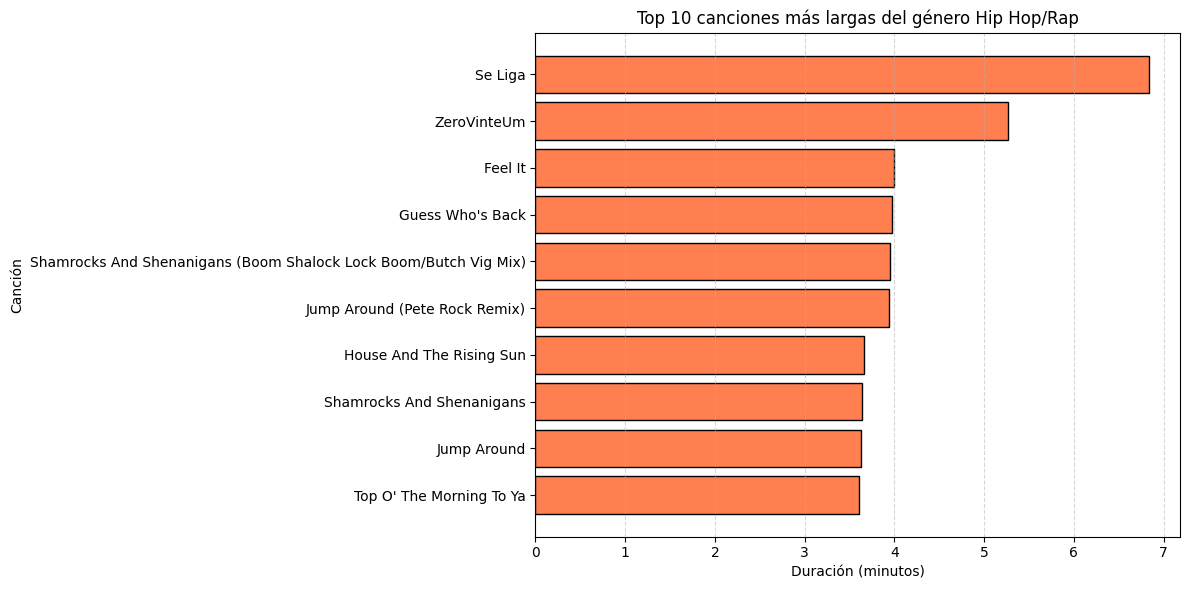

In [ ]:
# Devido que los minutos esta guardados en milisegundos los convertimos en minutos
df["Minutes"] = df["Milliseconds"] / 60000

# ahora ya con un nuevo campo definodo ordenamos por este
df = df.sort_values(by="Minutes", ascending=True)

# ahora si creamos la grafica
plt.figure(figsize=(12, 6))
plt.barh(df["track_name"], df["Minutes"], color="coral", edgecolor="black")


plt.title("Top 10 canciones más largas del género Hip Hop/Rap")
plt.xlabel("Duración (minutos)")
plt.ylabel("Canción")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)


plt.show()

5. vamos a obtener los 5 géneros con más canciones dentro de este dataset

In [19]:
#primero preparamos el query
top_genres_query = """
SELECT g.Name AS genre, COUNT(*) AS num_tracks
FROM track t
JOIN genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY num_tracks DESC
LIMIT 3;
"""
top_genres_df = pd.read_sql(top_genres_query, conexion)
# sacamos el top de los generos con mas numero de canciones
top_genres = top_genres_df["genre"].tolist()




Ahora sacamos un listado de los generos para consultar sus canciones por medio de otro query

In [17]:

placeholders = ", ".join(f"'{g}'" for g in top_genres)
query = f"""
SELECT g.Name AS genre, t.Milliseconds
FROM track t
JOIN genre g ON t.GenreId = g.GenreId
WHERE g.Name IN ({placeholders});
"""
df = pd.read_sql(query, conexion)

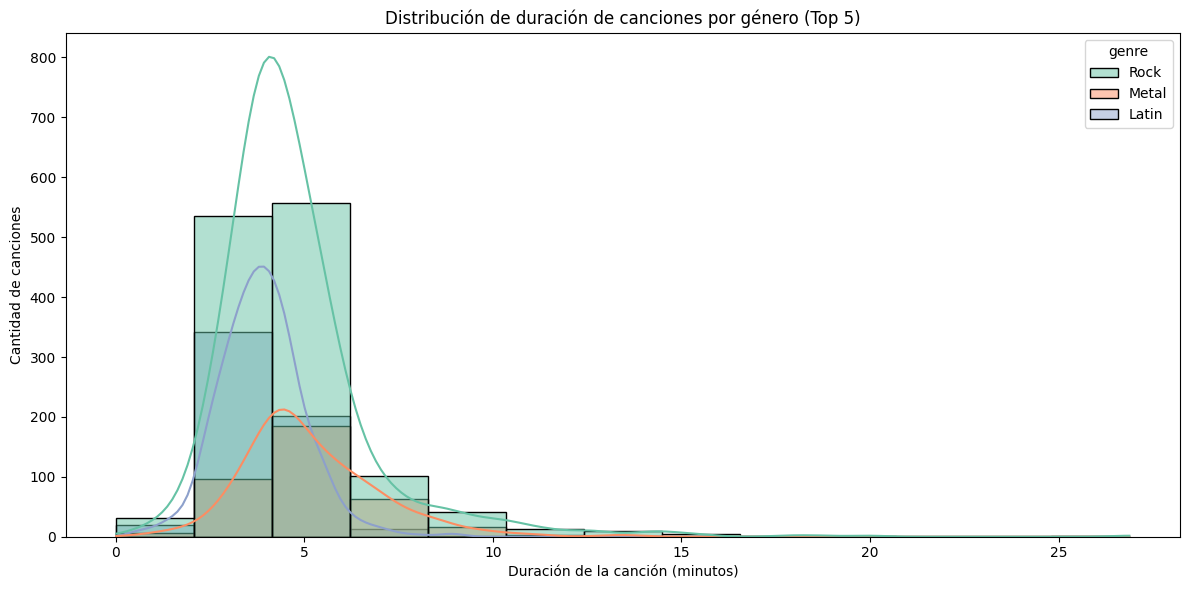

In [18]:
df["Minutes"] = df["Milliseconds"] / 60000


plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Minutes", hue="genre", bins='sturges', kde=True, alpha=0.5, palette='Set2')

plt.title("Distribución de duración de canciones por género (Top 5)")
plt.xlabel("Duración de la canción (minutos)")
plt.ylabel("Cantidad de canciones")
plt.tight_layout()
plt.show()

Como podemos ver el genero que gana y por mucho al menos en este dataset es el rock